# Algoritmos de optimización - Reto 2

Nombre: Víctor Manuel Rincón Yepes
Github: <br>

## Programación Dinámica. Viaje por el rio
* **Definición**: Es posible dividir el problema en subproblemas más pequeños, guardando las soluciones para ser utilizadas más adelante.
* **Características** que permiten identificar problemas aplicables:<br>
  -Es posible almacenar soluciones de los subproblemas para ser utilizados más adelante<br>
  -Debe verificar el principio de optimalidad de Bellman: “en una secuencia optima de decisiones, toda sub-secuencia también es óptima” (*)<br>
  -La necesidad de guardar la información acerca de las soluciones parciales unido a la recursividad provoca la necesidad de preocuparnos por la complejidad espacial (cuantos recursos de espacio usaremos)<br>

### Problema<br>
En un río hay **n** embarcaderos y debemos desplazarnos río abajo desde un embarcadero a otro. Cada embarcadero tiene precios diferentes para ir de un embarcadero a otro situado más abajo. Para ir del embarcadero i al j, puede ocurrir que sea más barato hacer un trasbordo por un embarcadero intermedio k. El problema consiste en determinar la combinación más barata.

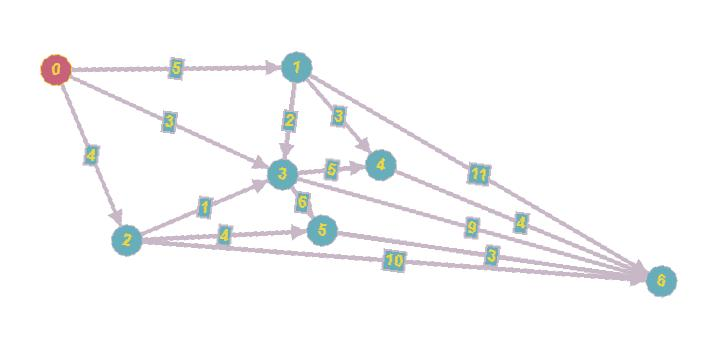

* Resuelve el problema del descenso por el rio utilizando la técnica de optimización que consideres más adecuada.

In [13]:
#Viaje por el rio - Programación dinámica
################################################################################
def river_travel_cost_dynamic_programming(cost_matrix):
    n = len(cost_matrix)
    
    # Inicialización de la tabla de costos mínimos
    T = [[float('inf')] * n for _ in range(n)]
    
    # El costo de llegar al mismo embarcadero es 0
    for i in range(n):
        T[i][i] = 0
    
    # Llenar la tabla utilizando programación dinámica tabular
    for k in range(n):
        for i in range(n):
            for j in range(n):
                T[i][j] = min(T[i][j], T[i][k] + cost_matrix[k][j])

    # El resultado final es el costo mínimo de viajar desde el embarcadero 0 hasta el último embarcadero
    return T[0][n-1]


cost_matrix = [
    [0, 5, 4, 3, float('inf'), float('inf'), float('inf')],
    [float('inf'), 0, float('inf'), 2, 3, float('inf'), 11],
    [float('inf'),float('inf'),0,1,float('inf'),4,10],
    [float('inf'),float('inf'),float('inf'),0,5,6,9],
    [float('inf'),float('inf'),float('inf'),float('inf'),0,float('inf'),4],
    [float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),0,3],
    [float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),0],
]

# Calcular el costo mínimo utilizando programación dinámica
resultado = river_travel_cost_dynamic_programming(cost_matrix)

# Imprimir el resultado
print("El costo mínimo de viajar por el río es:", resultado)



El costo mínimo de viajar por el río es: 11


Ahora voy a hacer el algoritmo de dijkstra

In [14]:
def dijkstra(graph, start, end):
    n = len(graph)
    visited = [False] * n
    distances = [float('inf')] * n
    distances[start] = 0

    for _ in range(n):
        min_distance = float('inf')
        min_index = -1
        for i in range(n):
            if not visited[i] and distances[i] < min_distance:
                min_distance = distances[i]
                min_index = i

        visited[min_index] = True

        for i in range(n):
            if not visited[i] and graph[min_index][i] != float('inf'):
                new_distance = distances[min_index] + graph[min_index][i]
                if new_distance < distances[i]:
                    distances[i] = new_distance

    print(f"Coste total de llegar del nodo {start} al nodo {end}: {distances[end]}")

In [15]:
graph = [
    [0, 5, 4, 3, float('inf'), float('inf'), float('inf')],
    [float('inf'), 0, float('inf'), 2, 3, float('inf'), 11],
    [float('inf'),float('inf'),0,1,float('inf'),4,10],
    [float('inf'),float('inf'),float('inf'),0,5,6,9],
    [float('inf'),float('inf'),float('inf'),float('inf'),0,float('inf'),4],
    [float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),0,3],
    [float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),float('inf'),0],
]
start_node = 0
end_node = 6
dijkstra(graph, start_node, end_node)
# Otro ejemplo
start_node = 2
end_node = 6
dijkstra(graph, start_node, end_node)

Coste total de llegar del nodo 0 al nodo 6: 11
Coste total de llegar del nodo 2 al nodo 6: 7


## Descenso del gradiente

In [16]:
import math                      #Funciones matematicas
import matplotlib.pyplot as plt  #Generacion de gráficos (otra opcion seaborn)
import numpy as np               #Tratamiento matriz N-dimensionales y otras (fundamental!)
import random
from sympy import symbols
from sympy.plotting import plot
from sympy.plotting import plot3d
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, sin, cos, exp

Vamos a buscar el minimo de la funcion paraboloide : $$f(x) =  x² + y²$$

Obviamente se encuentra en (x,y)=(0,0) pero probaremos como llegamos a él a través del descenso del gradiante.

In [17]:
#Definimos la funcion
#Paraboloide
f  = lambda X:      X[0]**2 + X[1]**2    #Funcion
df = lambda X: [2*X[0] , 2*X[1]]         #Gradiente

df([1,2])

[2, 4]

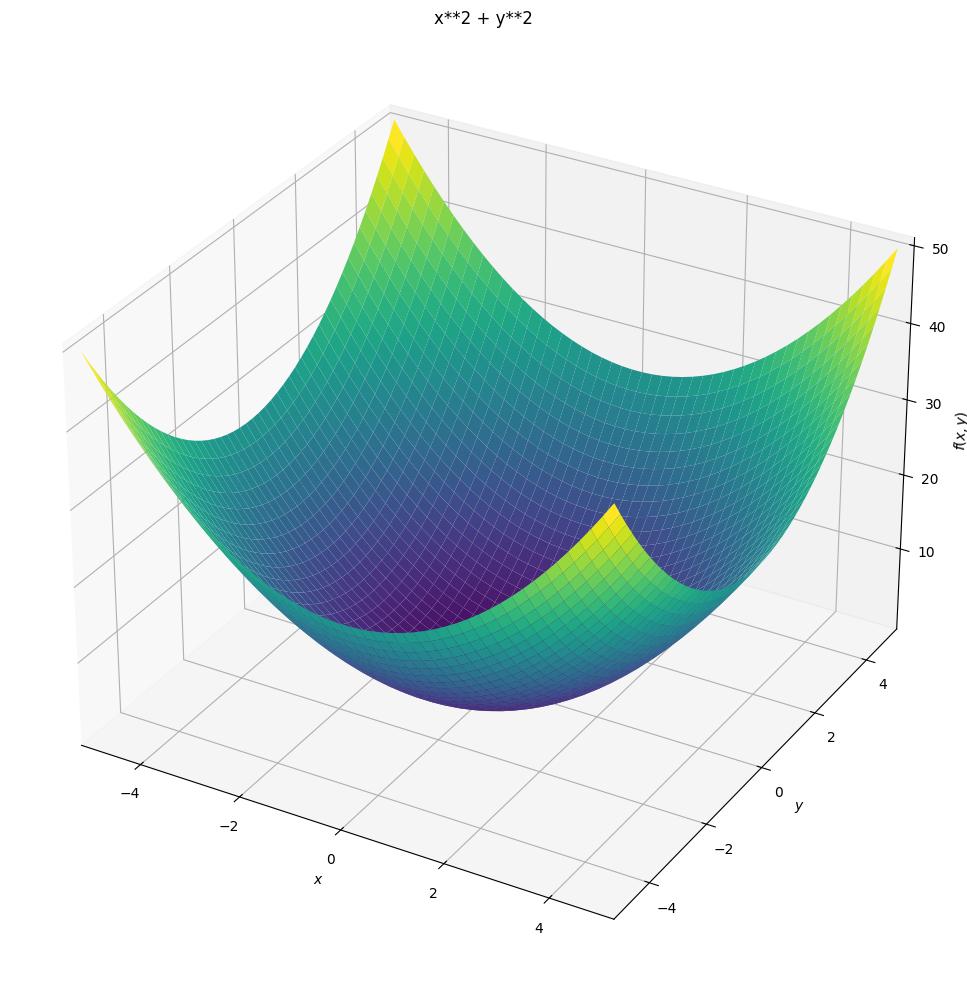

In [18]:
x,y = symbols('x y')
plot3d(x**2 + y**2,
       (x,-5,5),(y,-5,5),
       title='x**2 + y**2',
       size=(10,10))

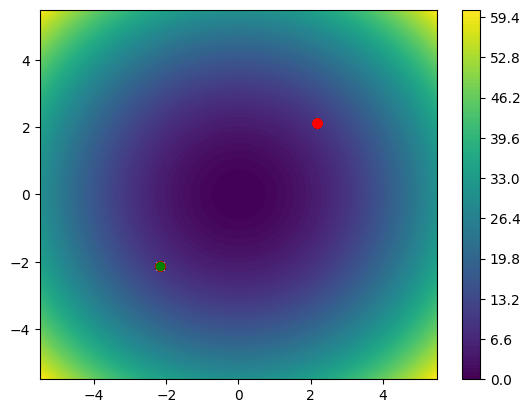

Solucion: [-2.1688111364964113, -2.124892580627258] 9.218910224995623


In [19]:
#Prepara los datos para dibujar mapa de niveles de Z
resolucion = 100
rango=5.5

X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))
for ix,x in enumerate(X):
  for iy,y in enumerate(Y):
    Z[iy,ix] = f([x,y])

#Pinta el mapa de niveles de Z
plt.contourf(X,Y,Z,resolucion)
plt.colorbar()

#Generamos un punto aleatorio inicial y pintamos de blanco
P=[random.uniform(-5,5  ),random.uniform(-5,5 ) ]
plt.plot(P[0],P[1],"x",c="white")

#Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA=1

#Iteraciones:50
for _ in range(1000):
  grad = df(P)
  #print(P,grad)
  P[0],P[1] = P[0] - TA*grad[0] , P[1] - TA*grad[1]
  plt.plot(P[0],P[1],"o",c="red")

#Dibujamos el punto final y pintamos de verde
plt.plot(P[0],P[1],"o",c="green")
plt.show()
print("Solucion:" , P , f(P))


## Reto

Optimizar la función siguiente mediante el algoritmo por descenso del gradiente.

$$f(x)=sin(1/2 * x^2 - 1/4 * y^2 + 3) * cos(2*x + 1 - e^y)$$

In [20]:
#Definimos la funcion
import math
f= lambda X: math.sin(1/2 * X[0]**2 - 1/4 * X[1]**2 + 3) *math.cos(2*X[0] + 1 - math.exp(X[1]) )


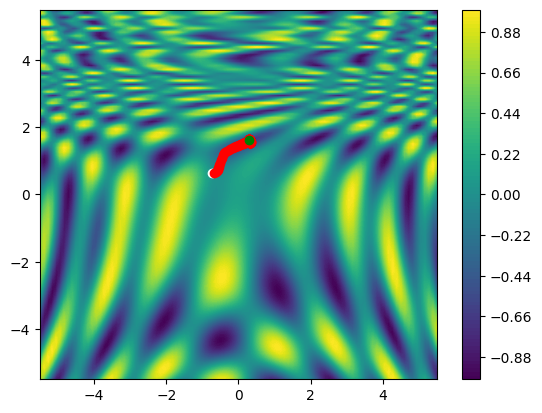

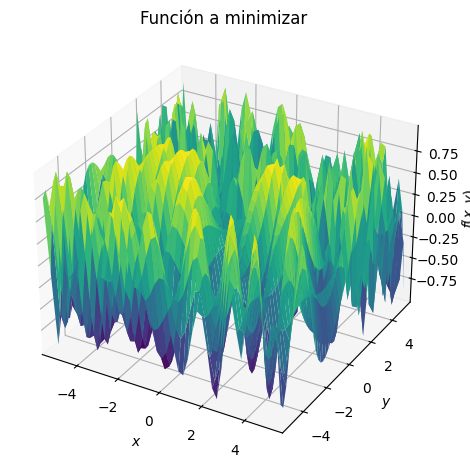

Solucion: [0.285549629609067, 1.63180599336468] Valor de la función en la solución: -0.638768277257471


In [21]:
# Definir la función y su gradiente
x, y = symbols('x y')
f_expr = sin(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2*x + 1 - exp(y))
f = lambda X: f_expr.subs({x: X[0], y: X[1]}).evalf()

df_expr_x = f_expr.diff(x)
df_expr_y = f_expr.diff(y)
df = lambda X: [df_expr_x.subs({x: X[0], y: X[1]}).evalf(), df_expr_y.subs({x: X[0], y: X[1]}).evalf()]

# Preparar datos para el gráfico de contorno
resolucion = 100
rango = 5.5

X = np.linspace(-rango, rango, resolucion)
Y = np.linspace(-rango, rango, resolucion)
Z = np.zeros((resolucion, resolucion))

for ix, x_val in enumerate(X):
    for iy, y_val in enumerate(Y):
        Z[iy, ix] = f([x_val, y_val])

# Pintar el mapa de niveles de Z
plt.contourf(X, Y, Z, resolucion)
plt.colorbar()

# Generar un punto aleatorio inicial y pintar de blanco
P = [np.random.uniform(-rango, rango), np.random.uniform(-rango, rango)]
plt.plot(P[0], P[1], "o", c="white")

# Tasa de aprendizaje. Fija. Sería más efectivo reducirlo a medida que nos acercamos.
TA = 0.1

# Iteraciones: 1000
for _ in range(1000):
    grad = df(P)
    P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
    plt.plot(P[0], P[1], "o", c="red")

# Dibujar el punto final y pintar de verde
plt.plot(P[0], P[1], "o", c="green")
plt.show()

# Visualizar la función objetivo en 3D
plot3d(f_expr, (x, -rango, rango), (y, -rango, rango), title='Función a minimizar')

plt.show()

# Imprimir la solución
print("Solucion:", P, "Valor de la función en la solución:", f(P))

Con ese mismo código voy a generar una función que genera un punto aleatorio inicial (P = [np.random.uniform(-rango, rango), np.random.uniform(-rango, rango)]) para poder mostrar varios casos de uso:

In [25]:
def descenso(TA, max_iteraciones=1000):
    # Definir la función y su gradiente
    x, y = symbols('x y')
    f_expr = sin(1/2 * x**2 - 1/4 * y**2 + 3) * cos(2*x + 1 - exp(y))
    f = lambda X: f_expr.subs({x: X[0], y: X[1]}).evalf()

    df_expr_x = f_expr.diff(x)
    df_expr_y = f_expr.diff(y)
    df = lambda X: [df_expr_x.subs({x: X[0], y: X[1]}).evalf(), df_expr_y.subs({x: X[0], y: X[1]}).evalf()]

    resolucion = 100
    rango = 5.5

    X = np.linspace(-rango, rango, resolucion)
    Y = np.linspace(-rango, rango, resolucion)
    Z = np.zeros((resolucion, resolucion))

    for ix, x_val in enumerate(X):
        for iy, y_val in enumerate(Y):
            Z[iy, ix] = f([x_val, y_val])

    # Pintar el mapa de niveles de Z
    plt.contourf(X, Y, Z, resolucion)
    plt.colorbar()

    # Generar un punto aleatorio inicial
    P = [np.random.uniform(-rango, rango), np.random.uniform(-rango, rango)]
    plt.plot(P[0], P[1], "o", c="white")

    for _ in range(max_iteraciones):
        grad = df(P)
        P[0], P[1] = P[0] - TA * grad[0], P[1] - TA * grad[1]
        plt.plot(P[0], P[1], "o", c="red")

    # Dibujar el punto final
    plt.plot(P[0], P[1], "o", c="yellow")
    plt.show()

    plt.show()
    return P, f(P)

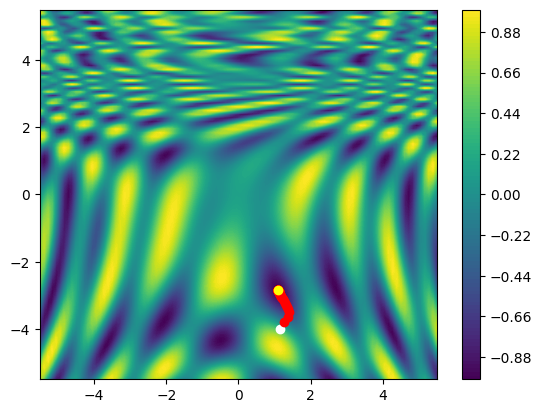

Solucion: [1.09965368244550, -2.85224317607253] Valor de la función en la solución: -1.00000000000000


In [26]:
P, s = descenso(TA=0.1, max_iteraciones=1000) # La tasa de aprendizaje sería mas efectiva reducirla a medida que nos acercamos
print("Solucion:", P, "Valor de la función en la solución:", s)

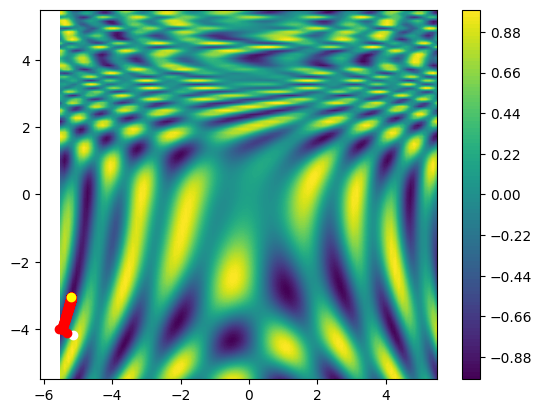

Solucion: [-5.18868520303290, -3.04897368104891] Valor de la función en la solución: -1.00000000000000


In [29]:
P, s = descenso(TA=0.05, max_iteraciones=5000) # Cambio la tasa de aprendizaje y el numero de iteraciones
print("Solucion:", P, "Valor de la función en la solución:", s)